In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


plt.style.use('fivethirtyeight')
%matplotlib inline

yf.pdr_override()

In [2]:
yf.pdr_override()

############################################
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

#############################################################################
netflix_df = yf.download("NFLX", start, end)


[*********************100%***********************]  1 of 1 completed


In [3]:
netflix_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,10.328571,10.392857,9.337143,9.994286,9.994286,29415400
2012-05-21,9.978571,10.312857,9.650000,10.248571,10.248571,25143300
2012-05-22,10.257143,10.342857,9.607143,9.672857,9.672857,40014800
2012-05-23,9.638571,10.307143,9.595714,10.272857,10.272857,44100000
2012-05-24,10.217143,10.241429,9.928571,10.038571,10.038571,20742400
...,...,...,...,...,...,...
2023-05-12,344.760010,348.170013,337.359985,339.890015,339.890015,6079900
2023-05-15,340.619995,341.899994,335.540009,335.890015,335.890015,3653000
2023-05-16,334.000000,335.170013,331.910004,333.750000,333.750000,3332200


In [4]:
# Create a new dataframe with only the 'Close column 
data = netflix_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
train_data = dataset[:training_data_len]

test_data = dataset[training_data_len:]

training_data_len


2630

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset)
joblib.dump(scaler, r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_scaler.h5")

scaled_data = scaler.transform(dataset)


scaled_data

array([[0.00337508],
       [0.00374684],
       [0.00290516],
       ...,
       [0.47669918],
       [0.48577806],
       [0.52778466]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([3.37508383e-03, 3.74684438e-03, 2.90516236e-03, 3.78234901e-03,
       3.43982871e-03, 3.42938716e-03, 3.26647997e-03, 2.82788595e-03,
       2.01335420e-03, 1.91101610e-03, 2.33916718e-03, 2.30366255e-03,
       2.52296026e-03, 2.26398075e-03, 2.47283411e-03, 1.92145905e-03,
       1.92563623e-03, 1.88595303e-03, 1.85044980e-03, 2.50416156e-03,
       2.70048478e-03, 3.34793217e-03, 2.99914610e-03, 2.51460451e-03,
       2.93649121e-03, 2.76314107e-03, 2.71510491e-03, 2.65036003e-03,
       2.83206313e-03, 3.06806816e-03, 2.93440122e-03, 3.80950067e-03,
       5.83120923e-03, 5.86671385e-03, 6.09645311e-03, 5.52001638e-03,
       5.81450051e-03, 6.50998406e-03, 6.49536394e-03, 6.09436592e-03,
       5.84373937e-03, 5.73722410e-03, 6.12360478e-03, 5.85209373e-03,
       5.45944868e-03, 5.55343381e-03, 1.35337667e-03, 6.70423264e-04,
       1.06933408e-03, 8.24974699e-04, 6.37007227e-04, 1.46198471e-04,
       1.46201260e-05, 2.29751808e-05, 6.24474296e-04, 8.56303540e-04,
     

(2570, 60, 1)

In [7]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
BatchNormalization()

model.add(LSTM(64, return_sequences=False))
model.add(Dense(64))
model.add(Dense(1))

In [8]:
ckpt = ModelCheckpoint(r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5", 
                       monitor='val_loss', verbose=1, save_best_only=True,mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.02,
                              patience=2, min_lr=1e-6, verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [9]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, verbose=1, 
                    batch_size=32, validation_split=0.2, 
                    callbacks=[ckpt, reduce_lr, es])

Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 0.0051
Epoch 1: val_loss improved from inf to 0.00404, saving model to E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5
65/65 [==============================] - 25s 291ms/step - loss: 0.0051 - val_loss: 0.0040 - lr: 0.0010
Epoch 2/100
65/65 [==============================] - ETA: 0s - loss: 4.8180e-04
Epoch 2: val_loss improved from 0.00404 to 0.00285, saving model to E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5
65/65 [==============================] - 18s 278ms/step - loss: 4.8180e-04 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/100
65/65 [==============================] - ETA: 0s - loss: 4.7753e-04
Epoch 3: val_loss improved from 0.00285 to 0.00241, saving model to E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5
65/65 [==============================] - 19s 290ms/step - loss: 4.7753e-04 - val_loss: 0.0024 - lr: 0.0010
Epoch 4/100
65/65 [==============================] - ETA: 

In [11]:
history_df = pd.DataFrame(history.history)
history_df

,loss,val_loss,lr
0,0.005079,0.004039,0.001000
1,0.000482,0.002851,0.001000
2,0.000478,0.002407,0.001000
3,0.000473,0.003766,0.001000
4,0.000502,0.002157,0.001000
5,0.000463,0.002115,0.001000
6,0.000436,0.001661,0.001000
7,0.000401,0.002478,0.001000
8,0.000434,0.001648,0.001000
9,0.000304,0.001447,0.000020


In [12]:
history_df.loc[:, ['val_loss']]

,val_loss
0,0.004039
1,0.002851
2,0.002407
3,0.003766
4,0.002157
5,0.002115
6,0.001661
7,0.002478
8,0.001648
9,0.001447


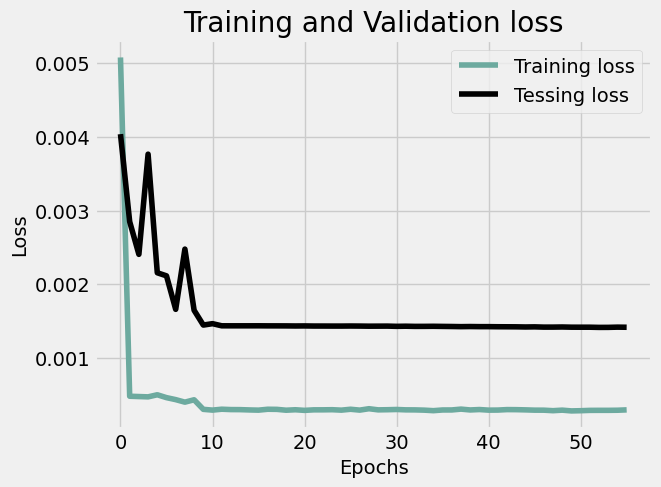

In [13]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], "#000", label='Tessing loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 72ms/step


16.31860043734342

C:\Users\HP\AppData\Local\Temp\ipykernel_11588\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


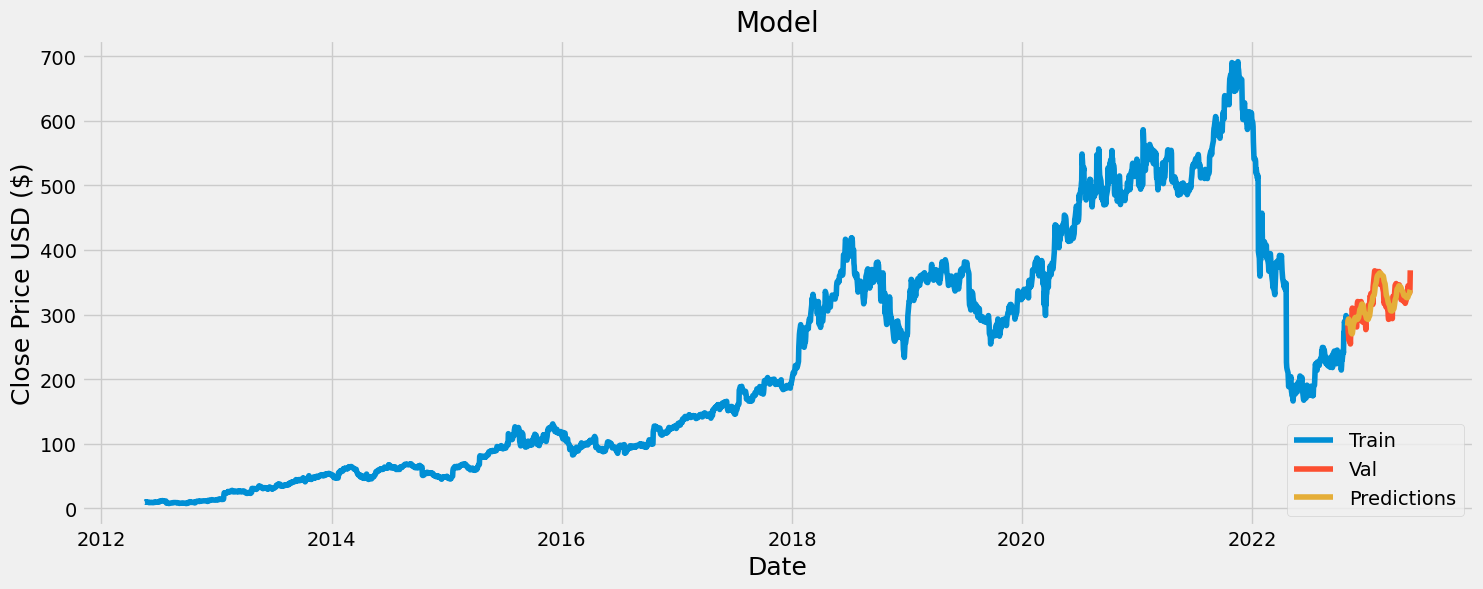

In [15]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [16]:
joblib.dump(train, r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_traindata.h5")
joblib.dump(valid, r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_validdata.h5")

['E:\\kareem\\book 4.2\\Graduation Project\\Netflix\\netflix_validdata.h5']

In [17]:
model.save(r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5")

In [18]:
model = load_model(r"E:\kareem\book 4.2\Graduation Project\Netflix\netflix_model.h5")

In [19]:
def predict(n):
    
    if (n <= 7) & (n >= 1):
    
        num = 1
        last = []

        last_60_value = netflix_df["Close"].iloc[-60:]

        for i in last_60_value:
            last.append(i)


        for i in range(n):
            np_list = np.reshape(last[-60:], (-1, 1))
            last_csl = scaler.transform(np_list)
            last_csl = np.reshape(last_csl, (1, 60, 1))

            pred = model.predict(last_csl)
            prediction = float(scaler.inverse_transform(pred)[0][0])

            last.append(prediction)
            print(f"The prediction number {num} is : {prediction}")
            num = num + 1

        return last[60:]
    
    return "Sorry you must inter mostly seven days or 'week' or less"

In [20]:
predict(7)

1/1 [==============================] - 1s 1s/step
The prediction number 1 is : 340.9897155761719
1/1 [==============================] - 0s 36ms/step
The prediction number 2 is : 343.38714599609375
1/1 [==============================] - 0s 34ms/step
The prediction number 3 is : 345.37158203125
1/1 [==============================] - 0s 38ms/step
The prediction number 4 is : 346.8714904785156
1/1 [==============================] - 0s 40ms/step
The prediction number 5 is : 347.9512023925781
1/1 [==============================] - 0s 35ms/step
The prediction number 6 is : 348.72320556640625
1/1 [==============================] - 0s 37ms/step
The prediction number 7 is : 349.29852294921875


[340.9897155761719,
 343.38714599609375,
 345.37158203125,
 346.8714904785156,
 347.9512023925781,
 348.72320556640625,
 349.29852294921875]